In [2]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#importing Dataset
df= sns.load_dataset("titanic")

In [4]:
#check the data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Missing values and imputing them

In [5]:
#checking missing values with percentage
df.isnull().sum() / len(df) *100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [5]:
# drop the deck column from dataset beacuse of 70% missing values
df.drop("deck", axis=1, inplace= True)

In [6]:
#filling missing values of age column by the mean of age
df["age"].fillna(df["age"].median(), inplace= True)

C:\Users\FAHAD\AppData\Local\Temp\ipykernel_14444\743035833.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace= True)


In [6]:
#Display Missing Values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
#Mean
df["age"].mean()

np.float64(29.36158249158249)

In [10]:
#Median
df["age"].median()

np.float64(28.0)

In [11]:
#Mode
df["age"].mode()[0]

np.float64(28.0)

In [7]:
# Fill missing values in 'embarked' and 'embark_town' with the most frequent value (mode)
df["embarked"].fillna(df["embarked"].mode()[0], inplace= True)
df["embark_town"].fillna(df["embarked"].mode()[0], inplace= True)

C:\Users\FAHAD\AppData\Local\Temp\ipykernel_14460\821733771.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["embarked"].fillna(df["embarked"].mode()[0], inplace= True)
C:\Users\FAHAD\AppData\Local\Temp\ipykernel_14460\821733771.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

<Axes: >

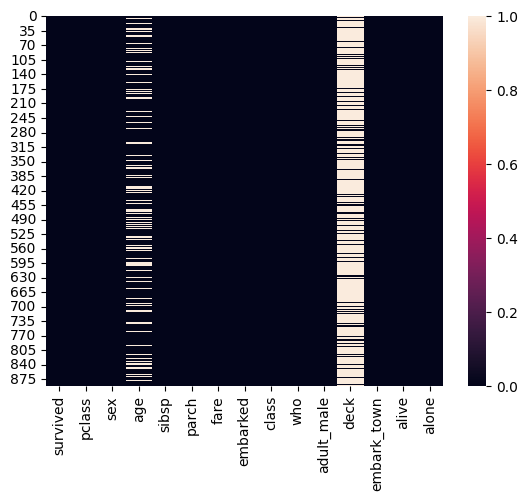

In [8]:
#Heatmap of Missing values
sns.heatmap(df.isnull())

In [14]:
#Checking minimum age
df.age.min()

np.float64(0.42)

In [15]:
#checking maximum age
df.age.max()

np.float64(80.0)

# Bining

> Binning means grouping data into small ranges or "bins".

<Axes: xlabel='age', ylabel='Count'>

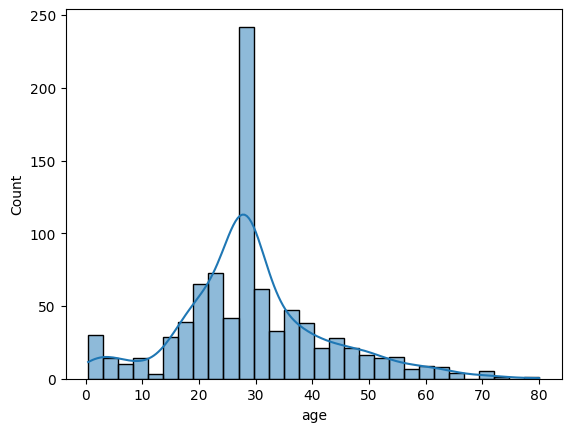

In [16]:
#histogram of age
sns.histplot(df["age"], kde= True)

In [17]:
#Bining of age column into 7 categories
bins = [0,1,5,12,18,30,50,80]
labels = ["infance", "toddlers", "kids", "teens", "youngs", "middle aged", "old"]

#Kis column ko bins ma convert krna ha

pd.cut(df["age"], bins= bins, labels =labels)

0           youngs
1      middle aged
2           youngs
3      middle aged
4      middle aged
          ...     
886         youngs
887         youngs
888         youngs
889         youngs
890    middle aged
Name: age, Length: 891, dtype: category
Categories (7, object): ['infance' < 'toddlers' < 'kids' < 'teens' < 'youngs' < 'middle aged' < 'old']

In [9]:
#Display first 5 rows in Dataframe
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Feature Engineering

In [12]:
#Bining of age column into 7 categories
bins = [0,1,5,12,18,30,50,80]
labels = ["infance", "toddlers", "kids", "teens", "youngs", "middle aged", "old"]

#Kis column ko bins ma convert krna ha

df["binned_age"] =pd.cut(df["age"], bins= bins, labels =labels)

In [10]:
#Display first 5 rows in Dataframe
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
# Count the number of occurrences for each age bin in 'binned_age'
df["binned_age"].value_counts()

binned_age
youngs         270
middle aged    241
teens           70
old             64
toddlers        30
kids            25
infance         14
Name: count, dtype: int64

In [21]:
#renaming column
df.rename(columns={"binned_age" : "age_groups"})

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,middle aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,middle aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,middle aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,youngs
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,youngs
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False,youngs
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,youngs


In [14]:
#Display first 5 rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,binned_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,middle aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,middle aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,middle aged


# Data Filteration

In [23]:
#based on columns
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'binned_age'],
      dtype='object')

In [15]:
# Create a new DataFrame with selected columns: survived, binned_age, fare, and class
df_01 =df[["survived", "binned_age", "fare", "class"]]


In [16]:
#Display first 5 rows of new Dataframe
df_01.head()

,survived,binned_age,fare,class
0,0,youngs,7.2500,Third
1,1,middle aged,71.2833,First
2,1,youngs,7.9250,Third
3,1,middle aged,53.1000,First
4,0,middle aged,8.0500,Third


In [17]:
#Summary of new Dataframe
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   binned_age  714 non-null    category
 2   fare        891 non-null    float64 
 3   class       891 non-null    category
dtypes: category(2), float64(1), int64(1)
memory usage: 16.3 KB


In [18]:
# Count the number of passengers in each class category
df["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [20]:
# filter data based on rows criteria
df_first =df_01[df_01["class"] == "First"]

In [19]:
# Get the maximum fare value from the 'fare' column in df_first
df_first["fare"].max()

NameError: name 'df_first' is not defined

In [21]:
# Count the number of passengers in each class within df_first
df_first["class"].value_counts()

class
First     216
Second      0
Third       0
Name: count, dtype: int64

In [31]:
df_first.head()

,survived,binned_age,fare,class
1,1,middle aged,71.2833,First
3,1,middle aged,53.1000,First
6,0,old,51.8625,First
11,1,old,26.5500,First
23,1,youngs,35.5000,First


In [22]:
# Get the minimum fare value from the 'fare' column
df["fare"].min()

np.float64(0.0)

In [24]:
#select only those rows which have paid more than 200 pound
df_200= df_01[df_01["fare"] > 50]

In [25]:
# Display summary information about the DataFrame df_200
df_200.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 1 to 879
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    160 non-null    int64   
 1   binned_age  138 non-null    category
 2   fare        160 non-null    float64 
 3   class       160 non-null    category
dtypes: category(2), float64(1), int64(1)
memory usage: 4.5 KB


In [26]:
# Count the number of passengers in each class within df_200
df_200["class"].value_counts()

class
First     139
Third      14
Second      7
Name: count, dtype: int64

In [27]:
# Filter passengers with fare > 80 and class = 'First', then sort them by fare (ascending)
df[(df["fare"] > 80) & (df["class"] == "First")].sort_values(by="fare")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,binned_age
445,1,1,male,4.0,0,2,81.8583,S,First,child,False,A,Southampton,yes,False,toddlers
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False,youngs
375,1,1,female,NaN,1,0,82.1708,C,First,woman,False,NaN,Cherbourg,yes,False,NaN
310,1,1,female,24.0,0,0,83.1583,C,First,woman,False,C,Cherbourg,yes,True,youngs
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False,youngs
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False,old
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True,middle aged
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True,middle aged


In [39]:
# how to add two filters
df_01[(df_01["fare"]> 70) & (df_01["class"] == "First")].sort_values(by= "fare")

,survived,binned_age,fare,class
540,1,middle aged,71.0000,First
745,0,old,71.0000,First
1,1,middle aged,71.2833,First
366,1,old,75.2500,First
218,1,middle aged,76.2917,First
...,...,...,...,...
341,1,youngs,263.0000,First
438,0,old,263.0000,First
258,1,middle aged,512.3292,First
737,1,middle aged,512.3292,First
